In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the files from the data folder : X_train , X_test , y_train and y_test

In [2]:
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59954, 92), (59954, 1), (14989, 92), (14989, 1))

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Creating a function to calculate the mean squared error of the model , mean absolute error , root mean square error and r square value 

In [5]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### Building an Adaboost Regressor Model for predicting the charging time of a BEV.

In [6]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    # "Graident BoostRegressor":GradientBoostingRegressor(),
    # "Xgboost Regressor":XGBRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 28.9276
- Mean Absolute Error: 14.0904
- R2 Score: 0.8905
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.8526
- Mean Absolute Error: 14.1743
- R2 Score: 0.8984


Lasso
Model performance for Training set
- Root Mean Squared Error: 44.7685
- Mean Absolute Error: 30.7339
- R2 Score: 0.7378
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.0154
- Mean Absolute Error: 31.0201
- R2 Score: 0.7346


Ridge
Model performance for Training set
- Root Mean Squared Error: 43.6847
- Mean Absolute Error: 30.5221
- R2 Score: 0.7504
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 44.1744
- Mean Absolute Error: 30.8423
- R2 Score: 0.7444


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 49.1697
- Mean Absolute Error: 28.5445
- R2 Score: 0.6838
---------

C:\Users\aman2\AppData\Local\Temp\ipykernel_7660\2290469203.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) # Train model


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.1225
- Mean Absolute Error: 1.1076
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6064
- Mean Absolute Error: 2.9810
- R2 Score: 0.9959




c:\Users\aman2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost Regressor
Model performance for Training set
- Root Mean Squared Error: 24.3406
- Mean Absolute Error: 21.0899
- R2 Score: 0.9225
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 24.5465
- Mean Absolute Error: 21.2056
- R2 Score: 0.9211




### Knowing about the parmeters of a model 

In [7]:

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(f"Model: {model_name}")
    
    # Print all parameters of the model
    print("Model parameters:")
    for param, value in model.get_params().items():
        print(f"  {param}: {value}")
    
    print('\nModel performance for Training set')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    
    print('='*35)
    print('\n')

  


Model: Linear Regression
Model parameters:
  copy_X: True
  fit_intercept: True
  n_jobs: None
  positive: False

Model performance for Training set
- Root Mean Squared Error: 28.9276
- Mean Absolute Error: 14.0904
- R2 Score: 0.8905
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.8526
- Mean Absolute Error: 14.1743
- R2 Score: 0.8984


Model: Lasso
Model parameters:
  alpha: 1.0
  copy_X: True
  fit_intercept: True
  max_iter: 1000
  positive: False
  precompute: False
  random_state: None
  selection: cyclic
  tol: 0.0001
  warm_start: False

Model performance for Training set
- Root Mean Squared Error: 44.7685
- Mean Absolute Error: 30.7339
- R2 Score: 0.7378
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.0154
- Mean Absolute Error: 31.0201
- R2 Score: 0.7346


Model: Ridge
Model parameters:
  alpha: 1.0
  copy_X: True
  fit_intercept: True
  max_iter: None
  positive: False
  random_sta

C:\Users\aman2\AppData\Local\Temp\ipykernel_7660\1837165907.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)  # Train model


Model: Random Forest Regressor
Model parameters:
  bootstrap: True
  ccp_alpha: 0.0
  criterion: squared_error
  max_depth: None
  max_features: 1.0
  max_leaf_nodes: None
  max_samples: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 1
  min_samples_split: 2
  min_weight_fraction_leaf: 0.0
  n_estimators: 100
  n_jobs: None
  oob_score: False
  random_state: None
  verbose: 0
  warm_start: False

Model performance for Training set
- Root Mean Squared Error: 2.1246
- Mean Absolute Error: 1.1140
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5687
- Mean Absolute Error: 2.9804
- R2 Score: 0.9959




c:\Users\aman2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: Adaboost Regressor
Model parameters:
  base_estimator: deprecated
  estimator: None
  learning_rate: 1.0
  loss: linear
  n_estimators: 50
  random_state: None

Model performance for Training set
- Root Mean Squared Error: 23.7667
- Mean Absolute Error: 20.9505
- R2 Score: 0.9261
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 24.0508
- Mean Absolute Error: 21.1223
- R2 Score: 0.9242




## Random Search CV (Hyperparameter Tuning of the model )

In [8]:
#Initialize few parameter for Hyperparamter tuning
# knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
# rf_params = {"max_depth": [5, 8, 15, None, 10],
#              "max_features": [5, 7, "auto", 8],
#              "min_samples_split": [2, 8, 15, 20],
#              "n_estimators": [100, 200, 500, 1000]}

ada_params={
    "n_estimators":[50,60,70,80],
    "loss":['linear','square','exponential']
}

In [9]:
# Models list for Hyperparameter tuning
randomcv_models = [
                #    ('KNN', KNeighborsRegressor(), knn_params),
                #    ("RF", RandomForestRegressor(), rf_params),
                   ("Adaboost",AdaBoostRegressor(),ada_params)
                   
                   ]

In [10]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\aman2\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


c:\Users\aman2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------- Best Params for Adaboost -------------------
{'n_estimators': 50, 'loss': 'linear'}


In [11]:
## Retraining the models with best parameters
models = {
    # "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features='auto', max_depth=None, n_jobs=-1),
    #  "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1),
     "Adaboost":AdaBoostRegressor(n_estimators=50,loss='exponential')
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

c:\Users\aman2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost
Model performance for Training set
- Root Mean Squared Error: 25.5618
- Mean Absolute Error: 21.9638
- R2 Score: 0.9145
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 25.6131
- Mean Absolute Error: 21.9997
- R2 Score: 0.9141




In [12]:
ada_params={
    "n_estimators":[50,60,70,80],
    "loss":['linear','square','exponential']
    
}

## Grid Search CV (Hyperparameter Tuning of the model )

In [13]:
# Models list for Hyperparameter tuning
grid_search_cv_models = [
                #    ('KNN', KNeighborsRegressor(), knn_params),
                #    ("RF", RandomForestRegressor(), rf_params),
                   ("Adaboost",AdaBoostRegressor(),ada_params)
                   
                   ]

In [14]:
##Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

model_param = {}
for name, model, params in grid_search_cv_models:
    grid = GridSearchCV(estimator=model,
                                   param_grid=params,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    grid.fit(X_train, y_train)
    model_param[name] = grid.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\aman2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------- Best Params for Adaboost -------------------
{'loss': 'exponential', 'n_estimators': 50}


In [15]:
## Retraining the models with best parameters
models = {
    # "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features='auto', max_depth=None, n_jobs=-1),
    #  "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1),
     "Adaboost":AdaBoostRegressor(n_estimators=50,loss='exponential')
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

c:\Users\aman2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost
Model performance for Training set
- Root Mean Squared Error: 24.9715
- Mean Absolute Error: 22.1046
- R2 Score: 0.9184
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 25.1163
- Mean Absolute Error: 22.1852
- R2 Score: 0.9174




In [16]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Adaboost': AdaBoostRegressor(n_estimators=50, loss='exponential')
}


In [17]:
from sklearn.ensemble import AdaBoostRegressor
import pickle

# Create and train AdaBoost model
adaboost_model = AdaBoostRegressor(n_estimators=50, loss='exponential')
adaboost_model.fit(X_train, y_train.values.ravel())  # Flatten y if warning arises

# Save to a .pkl file
with open(r"../Saving The Model Results/Adaboost_model.pkl", "wb") as file:
    pickle.dump(adaboost_model, file)


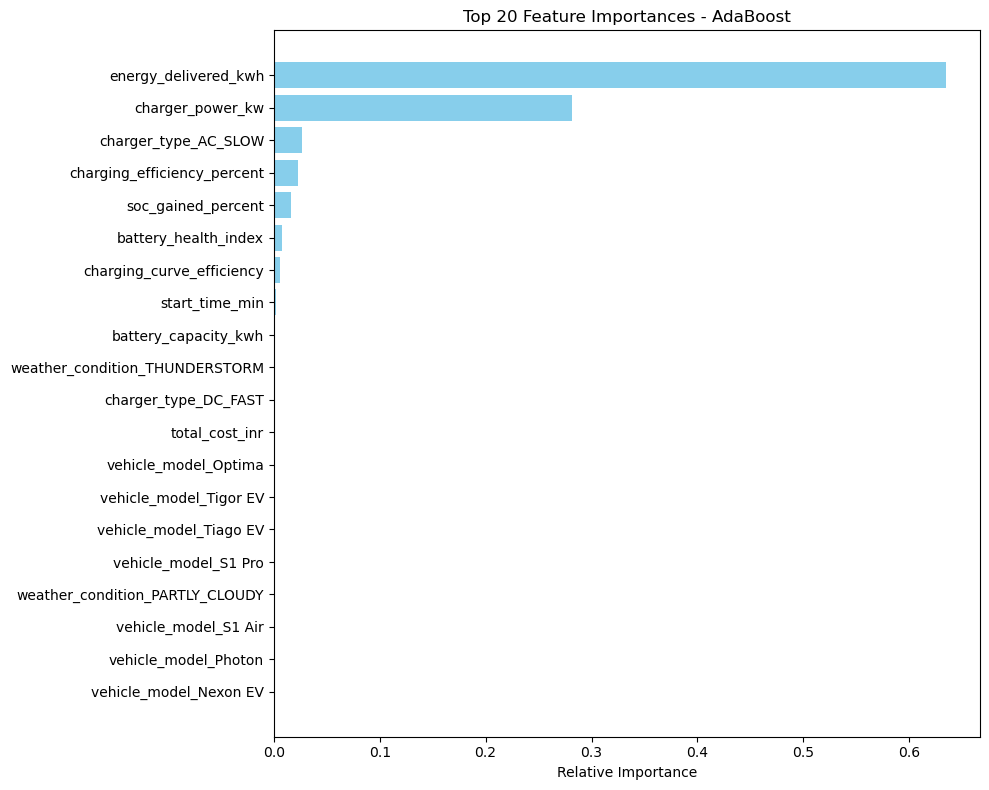

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get feature importances
importances = model.feature_importances_
features = X_train.columns

# Create DataFrame for better control
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort and select top 20 features
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feat_imp['Feature'][::-1], feat_imp['Importance'][::-1], color='skyblue')  # reverse for descending
plt.xlabel("Relative Importance")
plt.title("Top 20 Feature Importances - AdaBoost")
plt.tight_layout()
plt.show()


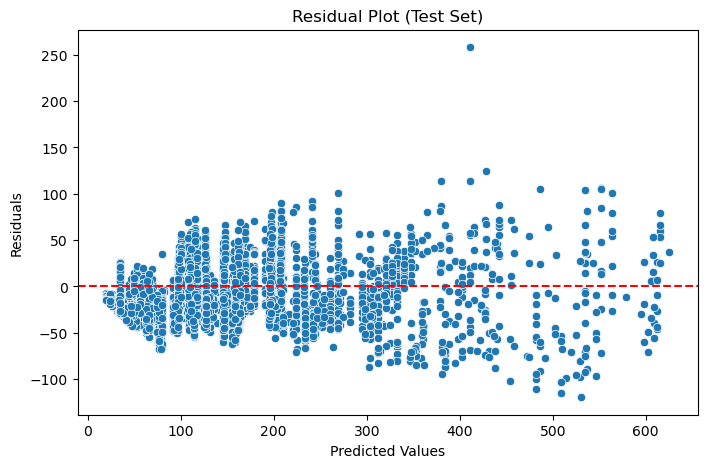

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure both are 1D (Series or arrays)
y_test_1d = y_test.squeeze()
y_test_pred_1d = y_test_pred.squeeze()

# Compute residuals
residuals = y_test_1d - y_test_pred_1d

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred_1d, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.show()


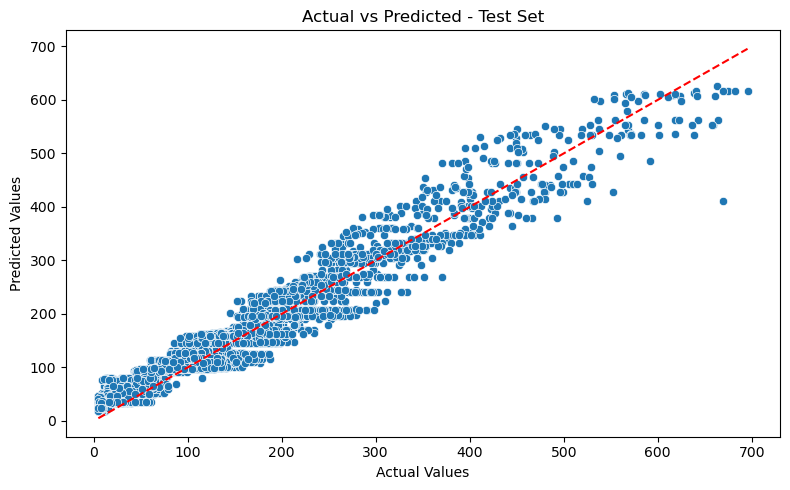

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure both are 1D
y_test_1d = y_test.squeeze()
y_test_pred_1d = y_test_pred.squeeze()

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_1d, y=y_test_pred_1d)
plt.plot([y_test_1d.min(), y_test_1d.max()], [y_test_1d.min(), y_test_1d.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Test Set")
plt.tight_layout()
plt.show()


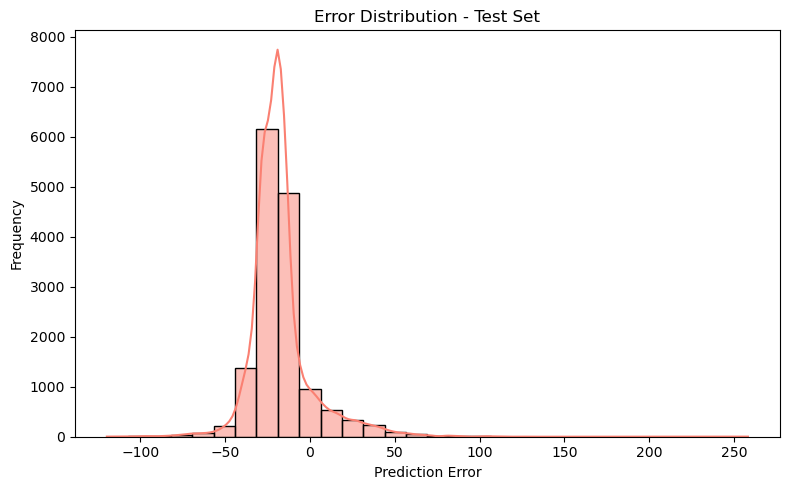

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to 1D
y_test_1d = y_test.squeeze()
y_test_pred_1d = y_test_pred.squeeze()

# Compute prediction errors
errors = y_test_1d - y_test_pred_1d

# Plot error distribution
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color='salmon')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution - Test Set")
plt.tight_layout()
plt.show()


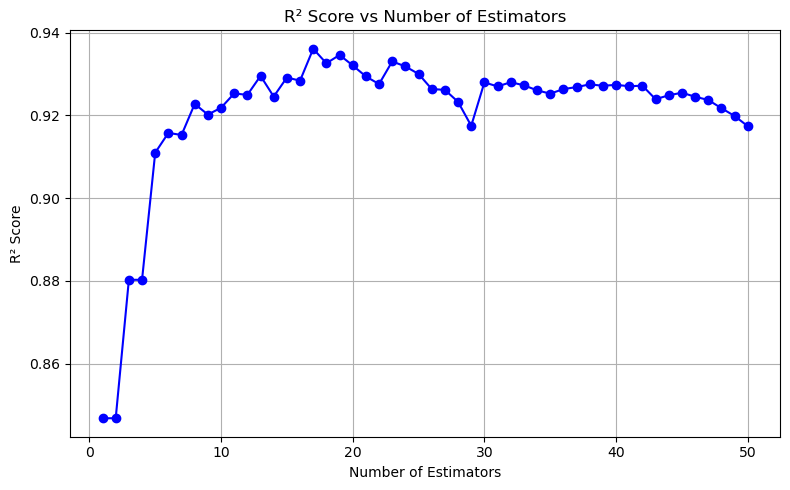

In [22]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Ensure y_test is 1D
y_test_1d = y_test.squeeze()

# Track R² score over boosting iterations
r2_scores = []
for y_pred_iter in model.staged_predict(X_test):
    y_pred_iter_1d = pd.Series(y_pred_iter).squeeze()  # Ensure 1D
    r2_scores.append(r2_score(y_test_1d, y_pred_iter_1d))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(r2_scores)+1), r2_scores, marker='o', color='blue')
plt.xlabel("Number of Estimators")
plt.ylabel("R² Score")
plt.title("R² Score vs Number of Estimators")
plt.grid(True)
plt.tight_layout()
plt.show()
